# Detecting hate speech 

PROBLEM

There has been a sharp increase in the usage of Social Media. Though social media has brought so many benefits to people, many have fallen into victims of cyber-bullying and hate speech. Many companies have failed to monitor and filter hate speech as a result. In many countries, social media companies rely heavily on content moderators, whom can have a strong bias on the content or fail to detect every content. I will be developing a machine learning model to automatically detect hate speech from a given dataset using various Python-based machine learning and data science libraries.

#PROBLEM DEFINTION

# MODELLING

In [5]:
# Importing all the libraries to use
# data visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for data plotting
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.naive_bayes import MultinomialNB

import re
import warnings
warnings.filterwarnings('ignore')

C:\Users\PC\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [6]:
# Loading the data

df = pd.read_csv("train_E6oV3lV.csv")

In [7]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [9]:
#finding number of classes
df.value_counts()

id     label  tweet                                                                                                                                   
1      0       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run                                      1
21304  0      doesn't the ball have to go forward from s kick off ? lol                                                                                   1
21317  0       @user and yet the dems have no issue with aboion, cloaking it in the lie of choice ..   #babiesmatter                                      1
21316  0      @user @user i have twice they've read my emails but not yet answered                                                                        1
21315  0      it's 2016. we shouldn't be afraid of who we love. i'm so sad about what happened in fl. why do people hate so much? #prayersfororlando      1
                                                                     

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [11]:
# Displaying hate speech
hate_tweet = df[df.label == 1]
hate_tweet.head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [12]:
# Displaying normal speech
normal_tweet = df[df.label == 0]
normal_tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [13]:
# Checking for missing values
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [14]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [15]:
# Statistical distributions
df_Stat=df[['label','tweet']].groupby('label').count().reset_index()
df_Stat.columns=['label','count']
df_Stat['percentage']=(df_Stat['count']/df_Stat['count'].sum())*100
df_Stat

,label,count,percentage
0,0,29720,92.98542
1,1,2242,7.01458


In [16]:
dt_transformed = df[['label', 'tweet']]
y = (dt_transformed.iloc[:, :-1].values).ravel()
dt_transformed

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [17]:
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [18]:
df_train, df_test = train_test_split(dt_transformed, test_size = 0.10, random_state = 42, stratify=dt_transformed['label'])
df_train.shape, df_test.shape

((28765, 2), (3197, 2))

<AxesSubplot:>

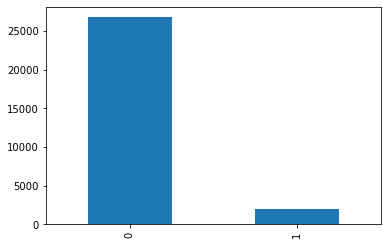

In [19]:
df_train['label'].value_counts().plot(kind='bar')

In [23]:
hate_words = ' '.join(hate_tweet)
normal_words = ' '.join(normal_tweet)



def get_wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [24]:
get_wordcloud(hate_words)
get_wordcloud(normal_words)


NameError: name 'WordCloud' is not defined

In [25]:
def wordListToFreqDict(wordlist):
    wordfreq = [(wordlist.count(p))/len(wordlist) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))


In [26]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [27]:
hate_dict = sortFreqDict(wordListToFreqDict(hate_words.split()))

In [28]:
len(hate_dict)

3